<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/NLP_quora_insincere_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quora Insincere Questions Classification


**GOAL** : Predict whether a question asked on Quora is sincere or not

# Load Libraries

In [1]:
import pandas as pd

# Load Dataset

In [3]:
!kaggle competitions download -c quora-insincere-questions-classification

100% 6.02G/6.03G [00:49<00:00, 173MB/s]
100% 6.03G/6.03G [00:49<00:00, 130MB/s]


In [4]:
!unzip /content/quora-insincere-questions-classification.zip

Archive:  /content/quora-insincere-questions-classification.zip
  inflating: embeddings.zip          
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
test = pd.read_csv('/content/test.csv')

In [6]:
df = pd.read_csv('/content/train.csv')

# Explore data

In [ ]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [ ]:
df.shape

(1306122, 3)

In [ ]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

In [ ]:
df[df.target==1].question_text.values[:5]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?'], dtype=object)

# Implement Bag of Words

## Create vocabulary and Configure text prepocessing using Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
# text preprocessing

import nltk

# Step 1: word_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# Step 2: stop_words removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')
#Step 3: stemming
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def text_preprocessor(text):
  return [SnowballStemmer(language='english').stem(word) for word in word_tokenize(text) if word not in stopwords]

In [ ]:
vectorizer = CountVectorizer(lowercase=True, tokenizer = text_preprocessor, max_features=1000 )
vectorizer.fit(df.question_text)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=1000,
                tokenizer=<function text_preprocessor at 0x7f90a2cf3a60>)

In [ ]:
vectorizer.get_feature_names_out()

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'address', 'admiss', 'adult', 'advanc',
       'advantag', 'advic', 'affect', 'africa', 'african', 'age', 'ago',
       'air', 'allow', 'almost', 'alon', 'alreadi', 'also', 'altern',
       'alway', 'amazon', 'america', 'american', 'among', 'amount',
       'analysi', 'android', 'anim', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'arm', 'armi', 'around', 'art', 'asian', 'ask',
       'associ', 'atheist', 'attack', 'attend', 'attract', 'australia',
       'avail', 'averag', 'avoid', 'away', 'b', 'babi', 'back', 'bad',
  

## Transform text to vectors using Count Vectorizer

In [ ]:
inputs = vectorizer.transform(df.question_text)

In [ ]:
inputs.shape

(1306122, 1000)

In [ ]:
inputs.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_inputs = vectorizer.transform(test.question_text)

# ML for Text Classification

### Split into train and test set

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature, test_feature, train_target, test_target =  train_test_split(inputs,df.target, test_size = 0.2, random_state=42)

In [ ]:
train_feature.shape

(1044897, 1000)

### Train a logistic regression model

In [8]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(max_iter = 2000, solver='sag' ).fit(train_feature, train_target)

### Predict on test data

In [28]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(test_target,clf.predict(test_feature) )

0.9462072925638817

In [ ]:
f1_score(test_target,clf.predict(test_feature))

0.38009528851244045

# Submission

In [ ]:
pred = clf.predict(test_inputs)

In [ ]:
test['prediction'] = pred

In [ ]:
del test['question_text']

In [ ]:
test.to_csv('submission.csv', index=None)

# Neural Networks and Embeddings 

In [9]:
sample_df = df.sample(100_000, random_state=42)

## Conversion to TF-IDF Vectors


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(lowercase=True, 
                             tokenizer=text_preprocessor,
                             max_features=1000)

In [14]:
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(max_features=1000,
                tokenizer=<function text_preprocessor at 0x7f6c5eccb6d0>)

In [15]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 38.6 s, sys: 123 ms, total: 38.7 s
Wall time: 47.5 s


In [16]:
targets = sample_df.target.values

In [17]:
%%time
test_inputs = vectorizer.transform(test.question_text)

CPU times: user 2min 7s, sys: 432 ms, total: 2min 7s
Wall time: 2min 18s


## Split training and validation set

In [19]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=42)

## Convert to PyTorch Tensors


In [20]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

normalize data along rows such that sum of squares = 1

In [21]:
train_tensors = F.normalize(torch.tensor(train_inputs.toarray()).float(), dim=0)
val_tensors = F.normalize(torch.tensor(val_inputs.toarray()).float(), dim=0)

create batches of data

In [22]:
train_ds = TensorDataset(train_tensors, torch.tensor(train_targets))
val_ds = TensorDataset(val_tensors, torch.tensor(val_targets))

In [23]:
batch_size = 64
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

# Logistic Regression Model


In [24]:
import torch.nn as nn

In [25]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)

    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [26]:
logreg_model = LogReg()

In [29]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)
    
    batch_out = logreg_model(batch_inputs)

    #convert output to prob
    probs = torch.sigmoid(batch_out[:,0])
    #convert prob to pred
    preds = (probs >= 0.5).int()
    
    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([64, 1000])
targets tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
outputs tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
accuracy 0.953125
f1_score 0.0


In [30]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)
        
        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        
        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [41]:
# function trains the model

def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs, 
                                          targets.float(), 
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

    return history

In [37]:
logreg_model = LogReg()

In [46]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
history = [evaluate(logreg_model, val_dl)]
history

[(13.921979942809799, 0.07805836886993603, 0.11182190421054941)]

In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)


In [ ]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)

In [47]:
history += fit(5, 0.01, logreg_model, train_dl, val_dl)


Epoch: 0; Loss: 3.1429; Accuracy: 0.9439; F1 Score: 0.4226
Epoch: 1; Loss: 3.1842; Accuracy: 0.9436; F1 Score: 0.4337
Epoch: 2; Loss: 3.2201; Accuracy: 0.9429; F1 Score: 0.4377
Epoch: 3; Loss: 3.2462; Accuracy: 0.9426; F1 Score: 0.4412
Epoch: 4; Loss: 3.2961; Accuracy: 0.9419; F1 Score: 0.4458


In [48]:
losses = [item[0] for item in history]

In [49]:
import matplotlib.pyplot as plt

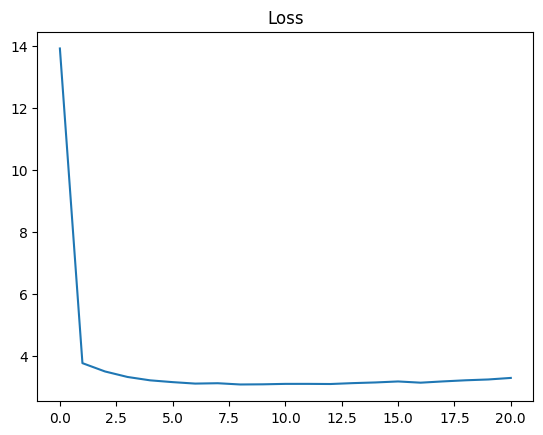

In [50]:
plt.plot(losses);
plt.title('Loss');

In [51]:
f1s = [item[2] for item in history]

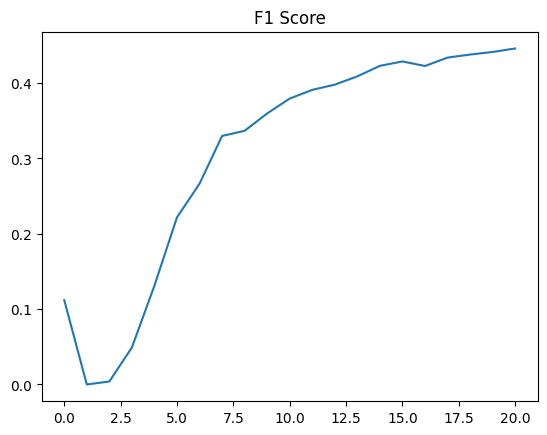

In [52]:
plt.plot(f1s)
plt.title('F1 Score');

# Feed Forward Neural Network


In [53]:
import torch.nn.functional as F

In [54]:
class FeedForwardModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)
        
    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [55]:
ff_model = FeedForwardModel()

In [56]:
history = [evaluate(ff_model, val_dl)]
history

[(13.624641926812211, 0.9392657249466951, 0.0)]

In [57]:
%%time
history += fit(5, 0.001, ff_model, train_dl, val_dl)

Epoch: 0; Loss: 3.3187; Accuracy: 0.9354; F1 Score: 0.4360
Epoch: 1; Loss: 3.2381; Accuracy: 0.9379; F1 Score: 0.4418
Epoch: 2; Loss: 3.2394; Accuracy: 0.9403; F1 Score: 0.4401
Epoch: 3; Loss: 3.4640; Accuracy: 0.9336; F1 Score: 0.4608
Epoch: 4; Loss: 3.5239; Accuracy: 0.9371; F1 Score: 0.4523
CPU times: user 6min 57s, sys: 619 ms, total: 6min 58s
Wall time: 7min 7s


# Predictions

In [58]:
test_tensors = torch.tensor(test_inputs.toarray()).float()

In [59]:
test_ds = TensorDataset(test_tensors)

In [60]:
test_dl = DataLoader(test_ds, batch_size)

In [61]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [62]:
test_preds = predict(ff_model, test_dl)


In [63]:
test['prediction'] = test_preds
del test['question_text']

In [64]:
test.to_csv('submission.csv', index=None)
!head submission.csv

qid,prediction
0000163e3ea7c7a74cd7,0
00002bd4fb5d505b9161,0
00007756b4a147d2b0b3,0
000086e4b7e1c7146103,0
0000c4c3fbe8785a3090,1
000101884c19f3515c1a,0
00010f62537781f44a47,0
00012afbd27452239059,0
00014894849d00ba98a9,0
